# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [10]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

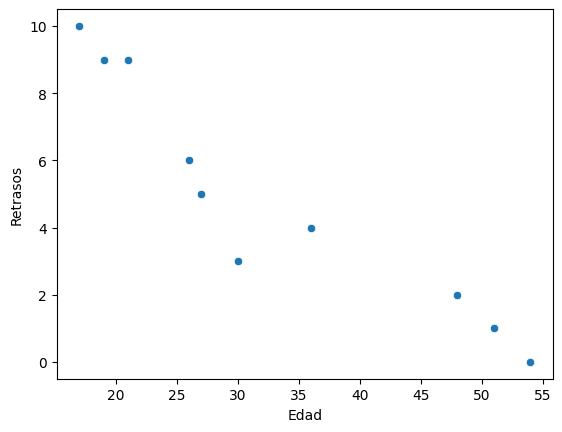

In [21]:
plt.figure()

sns.scatterplot(data=student_data, x='Edad', y='Retrasos')

plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

A simple vista parece que a mas edad menos retrasos.

H1: Hay una correlacion significativa entre la edad y los retrasos de los estudiantes.
H0: No hay una correlacion significativa entre la edad y los retrasos de los estudiantes.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [15]:
cov = student_data['Edad'].cov(student_data['Retrasos']) # Calculo de la covarianza

corr = student_data['Edad'].corr(student_data['Retrasos']) # Calculo de la correlacion

print(f'Covarianza entre Edad y Retrasos: {cov}')
print(f'Correlación entre Edad y Retrasos: {corr}')

Covarianza entre Edad y Retrasos: -45.56666666666666
Correlación entre Edad y Retrasos: -0.9391626886887122


* La covarianza negativa indica que mientras un valor aumenta el otro disminuye.
* La correlación cercana a -1 indica una fuerte correlación inversa.

Tanto la covarianza como la correlación nos indican lo mismo.

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [31]:
# Definir las variables predictoras (X) y la variable de resultado (y)
X = student_data[['Edad']]
y = student_data['Retrasos']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Hacer predicciones para todos los valores de X
y_pred = model.predict(X)

print(y_pred)

[ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


la variable resultado es y, que contiene los datos de la columna 'Retrasos'.

Estoy usando una regresión lineal.

Grafica tu modelo de regresión en tu diagrama de dispersión.

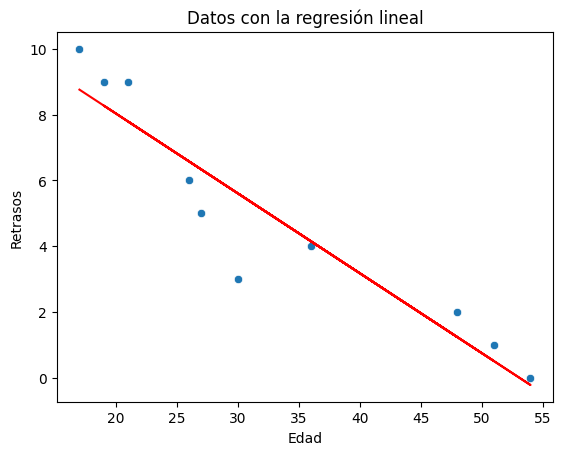

In [27]:
plt.figure()

sns.scatterplot(data=student_data, x='Edad', y='Retrasos')
plt.plot(X, y_pred, color='red')
plt.title('Datos con la regresión lineal')

plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Este modelo muestra que efectivamente hay una relación lineal entre la edad y los retrasos y que a mayor edad menos retrasos.

Tengo confianza en el modelo ya que los datos son claros.

Si, podemos decir que la edad es un buen predictor de la tardanza.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [34]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [43]:
matriz_correlacion = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corrwith(vehicles['CO2 Emission Grams/Mile'])
matriz_correlacion

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

La variable que mas se correlaciona con 'Emisiones de CO2 Gramos/Milla' es 'Fuel Barrels/Years', aunque 'Fuel Cost/Year' también muestra una correlación fuerte.

La variable que menos información útil aporta para determinar las emisiones de CO2 es 'Combined MPG'.

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [46]:
# Definir las variables predictoras (X) y la variable de resultado (y)
X2 = vehicles[['Fuel Barrels/Year']]
y2 = vehicles['CO2 Emission Grams/Mile']

# Crear un modelo de regresión lineal
model2 = LinearRegression()

# Ajustar el modelo a los datos
model2.fit(X2, y2)

# Hacer predicciones para todos los valores de X
y_pred2 = model2.predict(X2)

print(y_pred2)

[522.09509538 678.8977337  553.94563128 ... 253.13501437 253.13501437
 260.01068561]


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

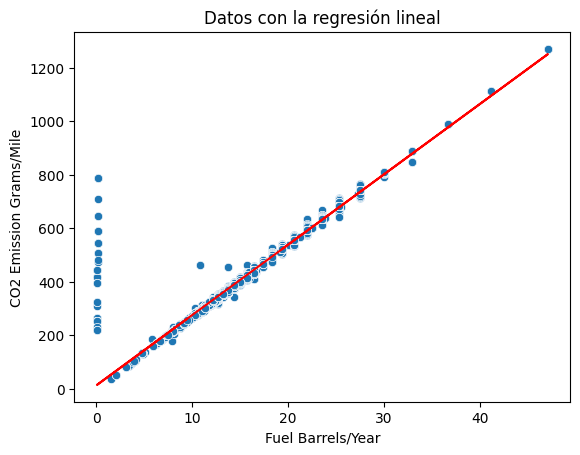

In [50]:
plt.figure()

sns.scatterplot(data=vehicles, y='CO2 Emission Grams/Mile', x='Fuel Barrels/Year')
plt.plot(X2, y_pred2, color='red')
plt.title('Datos con la regresión lineal')

plt.show()

Del modelo se puede extraer que a mayor gasto de combustible mas emisiones de co2.

Confio bastante en el modelo aunque hay un grupo de valores en la posición 0 del eje x que habría que analizar con mas detalle.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [51]:
df = pd.DataFrame({
  'x': [1,3,4,6,8,9,11,14],
  'y': [1,2,4,4,5,7,8,13]
})
df

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

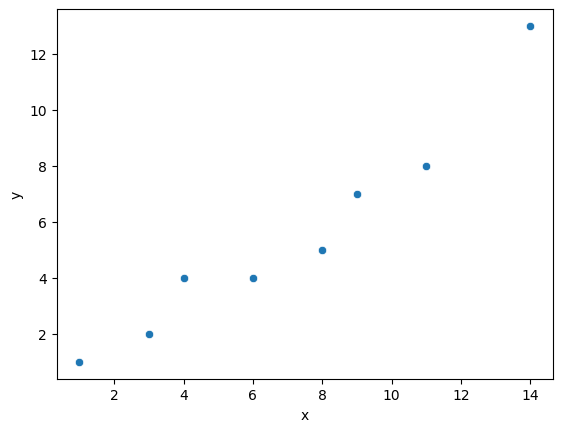

In [54]:
plt.figure()

sns.scatterplot(data=df, x='x', y='y')

plt.show()

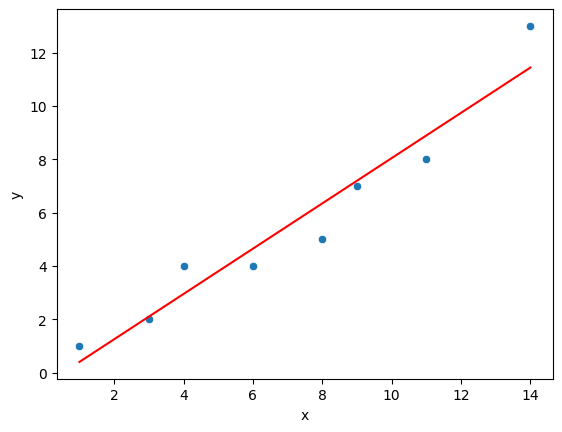

In [57]:
X3 = df[['x']]
y3 = df['y']

model3 = LinearRegression()

model3.fit(X3, y3)

y_pred3 = model3.predict(X3)

plt.figure()

sns.scatterplot(data=df, x='x', y='y')
plt.plot(X3, y_pred3, color='red')

plt.show()

In [59]:
mse = mean_squared_error(y3, y_pred3)
r2 = r2_score(y3, y_pred3)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 0.8712121212121214
Coeficiente de Determinación (R^2): 0.9316696375519905


¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

Segun el modelo de regresión lineal si existe una relación y a mayor gente invitada, mas gente rechaza la invitación.

Los valores de mse y r2 indican que el modelo esta bien ajustado y explica bien la variabilidad de los datos.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

El punto con un valor de x=14 es el mas alejado de la linea de regresion, de manera que puede estar afectando negativamente al modelo.

Error Cuadrático Medio (MSE): 0.34875444839857644
Coeficiente de Determinación (R^2): 0.908356495311323


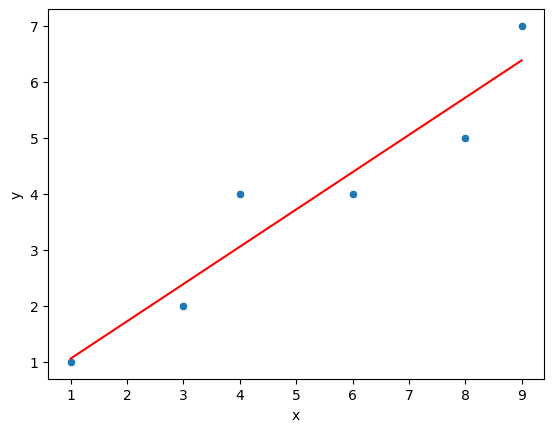

In [63]:
df_mod = df[:-1]

X4 = df_mod[['x']]
y4 = df_mod['y']

model4 = LinearRegression()

model4.fit(X4, y4)

y_pred4 = model4.predict(X4)

mse = mean_squared_error(y4, y_pred4)
r2 = r2_score(y4, y_pred4)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

plt.figure()

sns.scatterplot(data=df_mod, x='x', y='y')
plt.plot(X4, y_pred4, color='red')

plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

Con los nuevos datos, el modelo es muy similar, la tendencia es la mismo. Pero en este caso el mse es mas bajo, cosa que indica mejor correlación entre el modelo y los datos. El r2 es muy similar al anterior. Con estas observaciones podriamos afirmar que con los datos modificados sale un modelo mejor.